In [1]:
from FIG import FIG
import numpy as np
# Temporary PHATE / graphtools
if not hasattr(np, "float"):
    np.float = float
from PHATET import PHATET

In [2]:
from scipy import io
import pandas as pd


# Load EEG data
data = io.loadmat(r'n10_8-12hz.mat')
eeg = np.transpose(data['data'])

# select all channels
Data_eeg = eeg[:,:]

# load the labels
labels_d = pd.read_excel('labelsn10.xlsx')
labels = np.array(labels_d['Unnamed: 7'])
labels  = np.reshape(labels[:860], 860)

# check the dim of the data
print(Data_eeg.shape)

time_lab = np.arange(860)

(3302400, 18)


In [3]:

# here is how to implement FIG 
L1 = 3840
L3 = 3840
L2 = 50
fig = FIG(
    Data_eeg,
    window_size=L2,
    n_components=3,
    normalization="sqrt",
    lift_type="fourier",
    num_basis=7,
    period=10,
    center_window=L1,
    center_stride=L3,
)

MD = fig.fit()
print(MD.shape)  # (n_centers, n_centers)


(860, 860)


In [4]:

def obtain_embs(
    Data_eeg,
    window_size,
    center_window=3840,
    center_stride=3840,
    n_components_fig=3,
    n_components_phate=10,
    k_phate=20,
):
    # --- FIG distance ---
    fig = FIG(
        Data_eeg,
        window_size=window_size,
        n_components=n_components_fig,
        normalization="sqrt",
        lift_type="fourier",
        num_basis=7,
        period=10,
        center_window=center_window,
        center_stride=center_stride,
    )

    MD = fig.fit()   # <-- functional mahalanobis distance
    # MD shape: (n_centers, n_centers)

    # --- PHATE on FIG distance ---
    phate_10d = PHATET(
        knn_dist="precomputed_distance",
        k=k_phate,
        n_components=n_components_phate,
        verbose=0
    )
    Z_10d = phate_10d.fit_transform(MD)

    # --- Visualization embeddings ---
    phate_3d = PHATET(n_components=3, k=k_phate, verbose=0)
    phate_2d = PHATET(n_components=2, k=k_phate, verbose=0)

    Z_3d = phate_3d.fit_transform(Z_10d)
    Z_2d = phate_2d.fit_transform(Z_10d)

    return Z_2d, Z_3d, MD


In [5]:
win_sizes = [10, 20, 50, 100]

fig_2d_all = []
fig_3d_all = []
MD_all = []

for win_size in win_sizes:
    fig_2d, fig_3d, MD = obtain_embs(
        Data_eeg=Data_eeg,
        window_size=win_size,
        center_window=3840,
        center_stride=3840,
    )

    fig_2d_all.append(fig_2d)
    fig_3d_all.append(fig_3d)
    MD_all.append(MD)


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 733 with stress 0.31916265632332697


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 717 with stress 9117.846321255947


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 83 with stress 21734.143367944464


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 778 with stress 0.33306672066437787


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 279 with stress 7773.265101711476


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 50 with stress 18657.902537081696


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 555 with stress 0.32919896180950886


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 716 with stress 8992.035893927397


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 91 with stress 21048.527238046772


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 703 with stress 0.2822775955897826


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 435 with stress 9686.806357936788


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 54 with stress 23079.78865392725


In [6]:

# Make a copy so we don't destroy the original labels
labels_merged = labels.copy()

# Merge sleep stages
labels_merged[np.isin(labels_merged, [1, 2])] = 2   # S1-S2
labels_merged[np.isin(labels_merged, [3, 4])] = 4   # S3-S4


In [8]:
np.unique(labels_merged)

array([0., 2., 4., 5.])

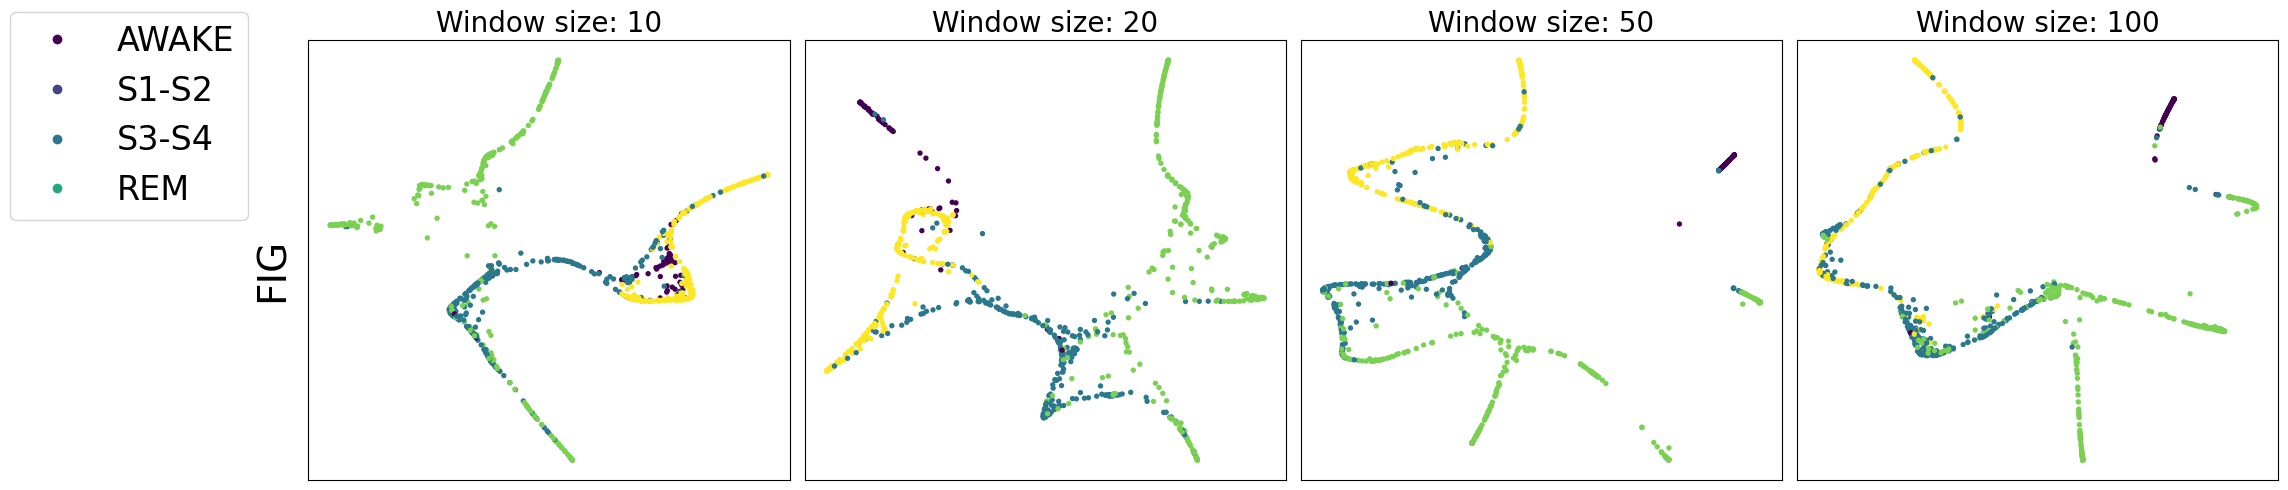

In [7]:
from matplotlib import pyplot as plt

# Define legend dictionary
legend_dict = {
    0: 'AWAKE',
    2: 'S1-S2',
    4: 'S3-S4',
    5: 'REM'
}
# this just created for legend
scatterplot = plt.scatter(fig_2d_all[0][:, 0], fig_2d_all[0][:, 1],c=labels, s=8)
plt.close()


# Create subplots for dig_2d
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Create subplots for fig_2d
for i, matrix in enumerate(fig_2d_all):
    ax = axes[i]
    ax.scatter(matrix[:, 0], matrix[:, 1], c=labels_merged, s=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Window size: {win_sizes[i]}', fontsize=20)  # Optional: Adding subplot titles

fig.text(-0.02, 0.45, 'FIG', va='center', rotation='vertical', fontsize=28)
            
# Create legend manually
legend_labels = [legend_dict[labels_merged] for labels_merged in np.unique(labels_merged)]
fig.legend(labels=legend_labels, loc='upper left', handles = scatterplot.legend_elements()[0], fontsize = 24, bbox_to_anchor=(-0.15, 1))

# 
# Add title
# plt.suptitle("Embeddings of FIG (2D)", fontsize = 20)
# elimiate the axis labels 
# window size just up to 100

# Adjust layout
plt.tight_layout()
plt.show()